Ejercicio:
$$f_n = 6f_{n-1} - 9f_{n-2} \\
f_0 = 1 \\
f_1 = 6 \\$$ 
Polinomio característico:
$$x^2 -6x + 9 \\ $$
Raíces: 
$$(x-3)^2 = 0 \\ 
x = 3 \\ $$
Solución de $f_n$ :

$$
f_n = \alpha 3^n + \beta n3^n
$$

Usando los casos base:  

$$
f_0 = \alpha 3^0 + \beta 0*3^0 = 1 \\
f_0 = \alpha = 1 \\

f_1 = \alpha 3^1 + \beta 1*3^1 = 6 \\
f_1 = \alpha 3 + \beta 3 = 6 \\
f_1 = 1 * 3 + \beta 3 = 6 \\ 
f_1 = \beta 3 = 3 \\
f_1 = \beta = 1
$$
Entonces:
$$
f_n = 3^n + n*3^n \\
f_n = 3^n (1+n)
$$

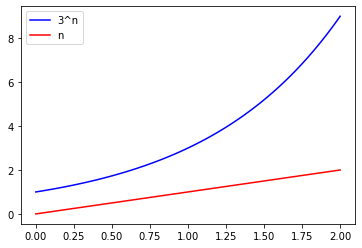

In [34]:
import matplotlib.pyplot  as plt
import numpy as np

x = np.linspace(0, 2, 100)

plt.plot(x,3**x, color="blue", label="3^n") 
plt.plot(x,x, color="red", label="n")
plt.legend()
plt.show()

Como muestra la gráfica de arriba $3^n$ es el que crece más rápido, entonces O($3^n(1+n)$) ~ O($3^n$)

**Ejercicio 13 de análisis de algoritmos de la práctica del primer examen**

¿Cuál es el tiempo de corrida de la siguiente función *f*? Nos interesa analizar prints. Asuma n es un entero no negativo.

In [6]:
def f(n):
    if n == 0 : return
    if n == 1 :
        print("Viva el Team!!")
        return 
    f(n-1)
    for i in range(1,6):
        f(n-2)

print(f(3))
# print(f(10))

Viva el Team!!
Viva el Team!!
Viva el Team!!
Viva el Team!!
Viva el Team!!
Viva el Team!!
None


Paso 1:
    Tamaño n = n
  
Paso 2:
    Operación de interés es print()

Paso 3:
$$T_0 = 0 \\
T_1 = 1 \\
T_n = T_{n-1} + 5T_{n-2}$$

Paso 4: (Usando HLCC(2))

$$
x^2 - x -5 \\

r_1 = \frac{1 + \sqrt{21}}{2} \\
r_2 = \frac{1 - \sqrt{21}}{2} \\

f_n = \alpha r_1^n + \beta r_2^n \\

\alpha = \frac{1}{\sqrt{21}} \\

\beta = \frac{-1}{\sqrt{21}} \\

f_n = \frac{1}{\sqrt{21}} * (\frac{1+\sqrt{21}}{2})^n - \frac{1}{\sqrt{21}} * (\frac{1-\sqrt{21}}{2})^n \\$$

Entonces:

O($(\frac{1+\sqrt{21}}{2})^n -(\frac{1-\sqrt{21}}{2})^n$) Es una O($a^n$)



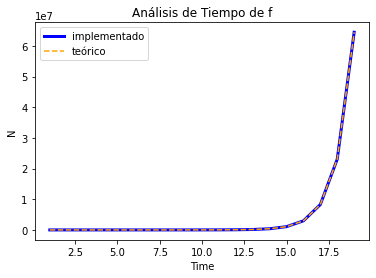

In [32]:
import matplotlib.pyplot  as plt
import math as m

# Paso 6:
def f_instrumentado(n):
    operaciones = 0
    if n == 0 : return operaciones
    if n == 1 :
        # print("Viva el Team!!")
        operaciones += 1
        return operaciones
    operaciones += f_instrumentado(n-1)
    for i in range(1,6):
        operaciones += f_instrumentado(n-2)
    return operaciones

def f_instrumentado_test(start, end, inc):
    axis = []
    axis.append([])
    axis.append([])
    axis.append([])
    for n in range(start, end, inc):
        axis[0].append(n)
        axis[1].append(f_instrumentado(n))
        axis[2].append((1/m.sqrt(21))*((1+m.sqrt(21))/2)**n - (1/m.sqrt(21))*((1-m.sqrt(21))/2)**n)
    return axis

a = f_instrumentado_test(1, 20, 1)
plt.plot(a[0], a[1], color="blue", linewidth="3", label="implementado")
plt.plot(a[0], a[2], linestyle="dashed", color="orange", label="teórico")
plt.xlabel('Time')
plt.ylabel("N")
plt.title("Análisis de Tiempo de f")
plt.legend()


**Relaciones de Recurrencia**

1a) $S_n = -S_{n-1}; S_0 = -1$
Usando HLCC(2)

$$
S_n = x^2 --x \\
S_n = x^2 + x \\

r_1 = 0 \\
r_2 = -1 \\

S_n = \alpha 0^n + \beta (-1)^n \\
S_0 = \alpha + \beta = -1 \\
$$

Como $S_1 = -S_0$ y $S_0 = -1$ entonces $S_1 = 1$

$$
S_1 = \alpha 0^1 + -\beta = 1 \\
S_1 = -\beta = 1 \\
\beta = -1 \\

\alpha + \beta = -1 \\
\alpha -1 = -1 \\
\alpha = 0 \\

S_n -(-1)^n \\

O((-1)^n) \\
$$


3a) $a_n = 5a_{n-1} - 6a{n-2}; a_0 = 1; a_1 = 0$

$$
x^2 -5x + 6 => (x-2)(x-3) = 0 \\

r_1 = 2
r_2 = 3

a_n = \alpha 2^n + \beta 3^n \\
a_0 = \alpha + \beta = 1\\
\alpha = 1 - \beta\\
a_1 = 2\alpha + 3\beta = 0\\
a_1 = 2- 2\beta + 3\beta = 0\\
a_1 = 2 + \beta = 0\\
a_1 = \beta = -2\\

\alpha = 1 -- 2\\
\alpha = 3\\

a_n = 3 * 2^n - 2 * 3^n\\
$$


3b) $a_n = 4a_{n-1} - 4a_{n-2}; a_0 = 6; a_1 = 8$

$$
x^2 -4 + 4 => (x-2)^2 = 0\\

r = 2\\

a_n = \alpha 2^n + \beta n 2^n\\
a_0 = \alpha = 6\\
a_1 = 6 * 2 + 2\beta = 8\\
a_1 = 2\beta = -4\\
a_1 = \beta = -2\\

a_ n = 6 * 2^n - 2n * 2^n\\
$$

3c) $a_n = a_{n-2} /4; a_0 = 1; a_1 = 0$

$$
x^2 - 1/4 => (x - 1/2)(x+1/2) = 0\\

a_n = \alpha(1/2)^n + \beta (-1/2)^n\\

a_0 = \alpha + \beta = 1\\

a_1 = (1/2)\alpha - (1/2)\beta = 0\\
\alpha = \beta\\

a_0 = 2\alpha = 1\\

\alpha = \beta = 1/2\\

a_n = (1/2)^{n+1} + (1/2) * (-1/2)^n\\
$$



Ejemplo de HLCC(2) que quede O(n):

$$
a_n = 2a_{n-1} -a_{n-2}; a_0 = 1; a_1 = 2\\

x^2 + -2n + 1 => (x-1)^2 = 0\\

r = 1\\

a_n = \alpha 1^n + \beta n 1^n \\

a_0 = \alpha = 1 \\
a_1 = \alpha + \beta = 2 \\
a_1 = 1 + \beta = 2 \\
a_1 = \beta = 1 \\

a_n = 1^{n+1} + n 1^n \\
a_n = 1 + n $$
O(n) ~ O(n)

